# PROJET 4 : Anticipez les besoins en consommation de bâtiments

Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.


Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

Votre prédiction se basera sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)

Vous cherchez également à évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions, qui est fastidieux à calculer avec l’approche utilisée actuellement par votre équipe. Vous l'intégrerez dans la modélisation et jugerez de son intérêt.

Vous sortez tout juste d’une réunion de brief avec votre équipe. Voici un récapitulatif de votre mission :

Réaliser une courte analyse exploratoire.
Tester différents modèles de prédiction afin de répondre au mieux à la problématique.
Avant de quitter la salle de brief, Douglas, le project lead, vous donne quelques pistes et erreurs à éviter :

""Douglas : L’objectif est de te passer des relevés de consommation annuels futurs (attention à la fuite de données). Nous ferons de toute façon pour tout nouveau bâtiment un premier relevé de référence la première année, donc rien ne t'interdit d’en déduire des variables structurelles aux bâtiments, par exemple la nature et proportions des sources d’énergie utilisées.. 

Fais bien attention au traitement des différentes variables, à la fois pour trouver de nouvelles informations (peut-on déduire des choses intéressantes d’une simple adresse ?) et optimiser les performances en appliquant des transformations simples aux variables (normalisation, passage au log, etc.).

Mets en place une évaluation rigoureuse des performances de la régression, et optimise les hyperparamètres et le choix d’algorithmes de ML à l’aide d’une validation croisée.""

# Sommaire

## I. Importation des données

### 1. Importation des bibliothèques
### 2. Importation du fichier

## II. Préparation du jeu de données

### 1. Séparation du jeu de données
### 2. Encodage et standardisation


## III. Modélisation

### 1. Régression Linéaire

###     Analyse des régulateurs
##### a. Regression Ridge
##### b. Lasso

### 2. Arbre de décisions

### 3. XGBoost

### 4. Support Vector Regression

### 5. Random Forest

## IV. Analyse des modélisations

### 1. Analyse des résultats
### 2. Analyse de l'apport des variables sur nos modèles


## V Modélisation avec la variable ENERGYSTAR Score

### 1. Séparation du jeu de données
### 2. Encodage et standardisation

### 3. XGBoost
### 4. Random Forest


## IV. Analyse des modélisations

### 1.Analyse des résultats
### 2.Analyse de l'apport des variables sur nos modèles

## V. Modélisation avec la variable ENERGYSTAR Score

### 1. XGBoost
### 2. Random Forest

### 3. Analyse des résultats

## Optimisation de notre modèle

### 1. Cross Validation
### 2. GridSearchCV
### 3. Analyse de l'apport des variables sur nos modèles

# 

## I. Importation des données

### 1. Importation des bibliothèques

In [1]:
# Importation bibliothèque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import shap
import warnings
warnings.filterwarnings('ignore')


# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold


# Séparation du jeu de données
from sklearn.model_selection import train_test_split

# Modélisation
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

# Mesures de performances
from sklearn.metrics import *
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

# Tests avec un régulateur pour la Régression Linéaire
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Optimisation du modèle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV


In [2]:
start = time.perf_counter()

end = time.perf_counter()

### 2. Importation du fichier

In [3]:
data = pd.read_csv('data_clean_final.csv')
data

,NumberofBuildings,NumberofFloors,Neighborhood,PropertyGFAParking,SteamUse(kBtu),%_stream,BuildingType,PrimaryPropertyType,ENERGYSTARScore,GHGEmissionsIntensity,...,%_elec,%_gaz,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),Electricity(kBtu),NaturalGas(kBtu),PropertyGFATotal,PropertyGFABuilding(s),SiteEnergyUse(kBtu),TotalGHGEmissions
0,0.693147,1.386294,GREATER DUWAMISH,0.000000,0.000000,0.000000,NonResidential,Other,NaN,0.0000,...,1.000006,0.000000,2.348269,3.001293,10.691177,0.000000,10.228863,10.228863,11.498627,0.269615
1,0.693147,1.386294,DOWNTOWN,0.000000,0.000000,0.000000,NonResidential,Office,NaN,0.0000,...,0.999979,0.000000,2.348269,3.001293,10.691177,0.000000,10.963376,10.963376,11.498627,0.269615
2,0.693147,1.386294,DOWNTOWN,0.000000,0.000000,0.000000,NonResidential,Other,NaN,0.0100,...,1.000011,0.000000,2.348269,3.001293,10.698627,0.000000,10.814987,10.814987,11.498627,0.270027
3,0.693147,1.386294,MAGNOLIA / QUEEN ANNE,0.000000,0.000000,0.000000,NonResidential,Warehouse,NaN,0.0100,...,0.999997,0.000000,2.348269,3.001293,10.953155,0.000000,10.595459,10.595459,11.498627,0.336472
4,0.693147,1.098612,GREATER DUWAMISH,0.000000,0.000000,0.000000,Nonresidential COS,Other,NaN,0.0100,...,1.000008,0.000000,2.348269,3.001293,11.189575,0.000000,10.576764,10.576764,11.498627,0.405465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.693147,4.158883,DOWNTOWN,11.980432,0.000000,0.000000,Nonresidential COS,Office,89.0,0.3200,...,1.000000,0.000000,3.939638,5.069533,17.935786,0.000000,13.381685,13.162967,17.935786,6.064413
1606,0.693147,2.197225,EAST,0.000000,15.547227,0.091485,NonResidential,Other,NaN,4.1025,...,0.753349,0.154978,5.693624,6.709784,17.655578,16.074334,11.975017,11.975017,17.938805,7.146670
1607,0.693147,2.772589,DOWNTOWN,0.000000,0.000000,0.000000,NonResidential,Other,NaN,1.8800,...,1.000000,0.000000,5.693624,6.709784,17.945820,0.000000,12.349658,12.349658,17.945820,6.074426
1608,0.693147,1.945910,GREATER DUWAMISH,11.624243,0.000000,0.000000,NonResidential,Mixed Use Property,NaN,1.5600,...,0.999795,0.000204,5.693624,6.709784,17.971611,9.476850,12.563751,12.068114,17.971815,6.101708


Dans le cadre de notre première modélisation, nous allons effectuer le premier modèle sans le EnergyStarScore.
Nous allons supprimer la colonne puis supprimer les lignes manquantes

Nous avons procédé à la suppression des valeurs numériques qui peuvent impacter nos données.

Nous souhaitons, par la suite, procéder à l'intégration des données de l'EnergyStarScore.
Notre projet est donc de supprimer les lignes avec les valeurs manquantes puis nous allons démarrer notre modélisation.

<AxesSubplot:>

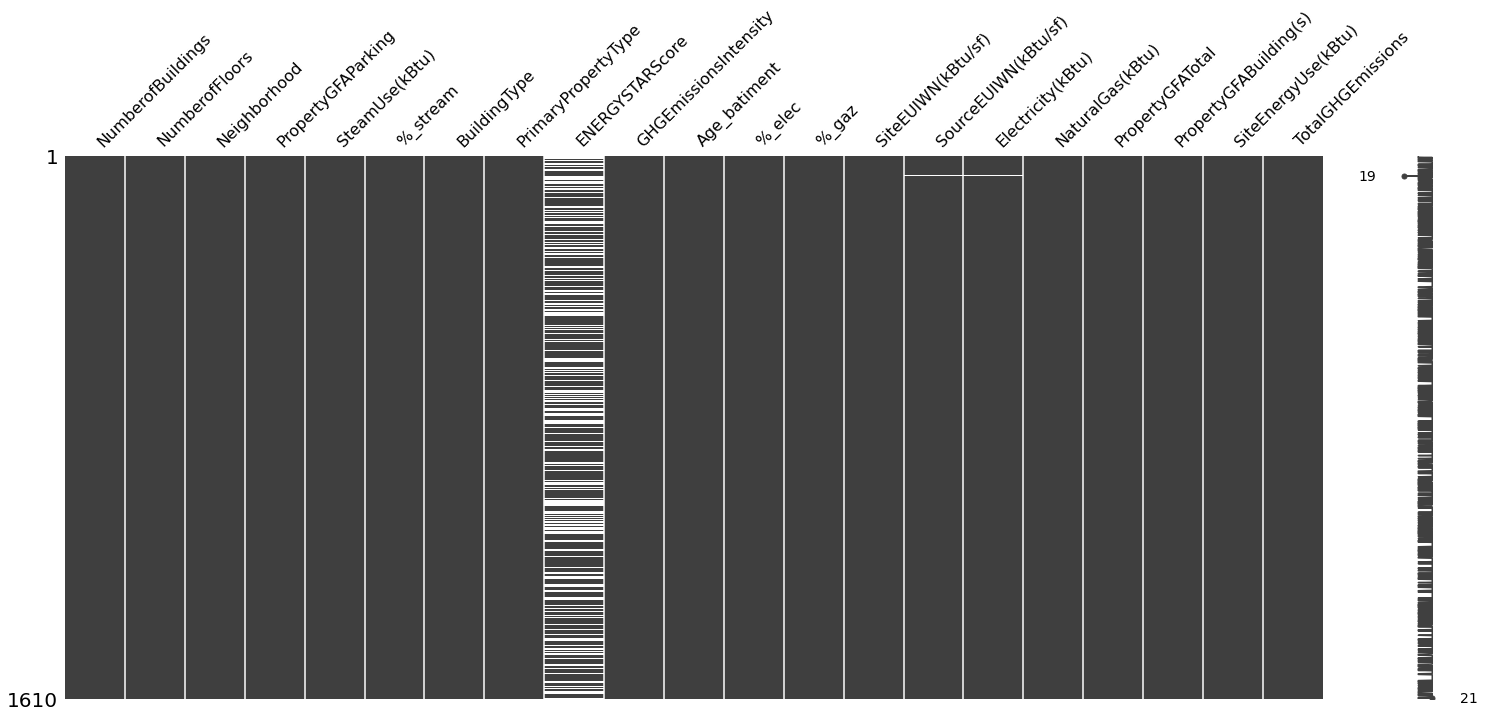

In [4]:
msno.matrix(data)

In [5]:
#sauvegarde séparée du energy star score
energy_star = data[['ENERGYSTARScore']]
data.drop(columns = ['ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
                   'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], inplace=True)

<AxesSubplot:>

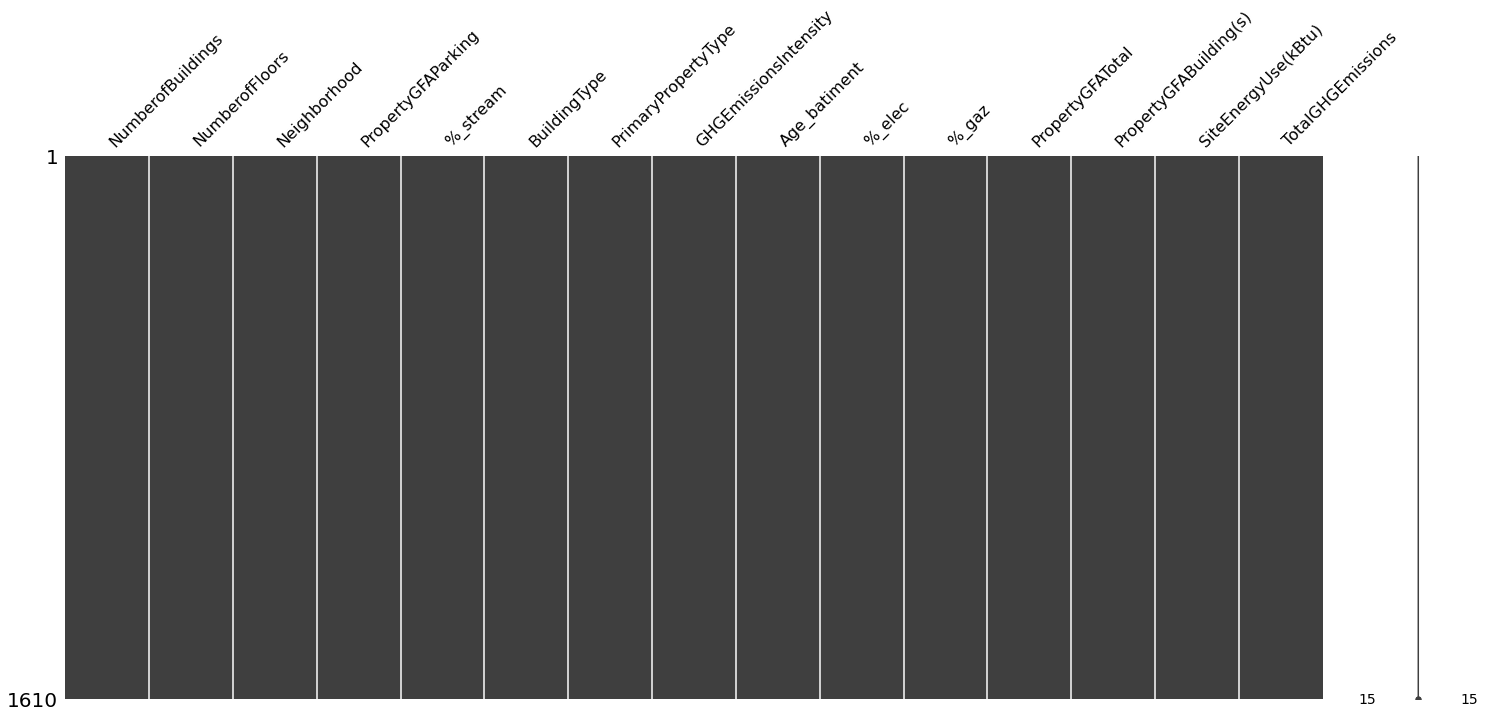

In [6]:
msno.matrix(data)

## II. Préparation du jeu de données

### 1. Séparation du jeu de données

In [7]:
# Création du train_test_split

y = data['TotalGHGEmissions']
X = data.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

print ('Données apprentissage', X_train.shape)
print ('Données de test', X_test.shape)

Données apprentissage (1207, 12)
Données de test (403, 12)


### 2. Encodage et standardisation

In [8]:
# Sélection des variables qualitatives et quantitatives

numeric = X_train.select_dtypes(['float64', 'int64']).columns
normalisation=StandardScaler()

# Preprocessing OneHot    
categ=X_train.select_dtypes('object').columns
OneHot=OneHotEncoder(handle_unknown='ignore',sparse=False)


preprocessor = ColumnTransformer(transformers=[ ('num', normalisation, numeric),
                                                ('cat', OneHot, categ)])

In [9]:
# Apprentissage de l'encodage et transformation des données d'entrainement
X_train=preprocessor.fit_transform(X_train)

# Récupération des noms des variables encodeés
encoded_names=numeric.to_list()
encoded_Cat_names=preprocessor.named_transformers_['cat'].get_feature_names(categ).tolist()
encoded_names.extend(encoded_Cat_names)

In [10]:
# Application du transformer déjà entrainé sur les données de test
X_test= preprocessor.transform(X_test)

In [11]:
# création des data frame contenant les jeux encodés
encoded_X_train=pd.DataFrame(X_train,columns=encoded_names)
encoded_X_test=pd.DataFrame(X_test,columns=encoded_names)

# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = encoded_X_train.corr()

# optional: display a heatmap of the correlation matrix
# plt.figure(figsize=(11,11))
# sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.70:  #0.90 pour memoire essai à 0.80
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
corr_features

{'%_gaz',
 'BuildingType_Nonresidential COS',
 'PrimaryPropertyType_School',
 'PropertyGFABuilding(s)'}

In [12]:
encoded_X_train.drop(labels=corr_features, axis=1, inplace=True)
encoded_X_test.drop(labels=corr_features, axis=1, inplace=True)


var = VarianceThreshold(threshold=0).fit(encoded_X_train)

low_var = var.get_support(indices=False)

low_var_encoded_X_train=encoded_X_train.loc[:,low_var]
low_var_encoded_X_test=encoded_X_test.loc[:,low_var]
low_var_encoded_X_train.head(5)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,%_stream,Age_batiment,%_elec,PropertyGFATotal,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,...,BuildingType_NonResidential,BuildingType_SPS-District K-12,PrimaryPropertyType_Hotel,PrimaryPropertyType_Medical Center,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse
0,-0.119315,2.925536,2.388477,-0.21906,-1.142976,0.729951,2.698065,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.119315,3.845430,2.383877,-0.21906,-0.570814,1.106593,2.698065,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.119315,2.381561,2.300979,-0.21906,-0.841838,1.078431,2.359512,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.119315,-0.354715,-0.501054,-0.21906,1.175784,1.106592,-1.168155,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.119315,0.099094,-0.501054,-0.21906,0.964988,-1.831616,-1.195007,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
X_train=low_var_encoded_X_train
X_test=low_var_encoded_X_test

## III. Modélisation

### 1. Régression Linéaire

In [14]:
# Création du modèle
model1 = LinearRegression()

# Entrainement du modèle
model1.fit(X_train, y_train)

# Prédiction
prediction = model1.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A1 = model1.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A1)


R1 = model1.score(X_test, y_test)
print("Le score de test est de : ",R1)

T1 = end-start
print("La durée de chargement de la cellule est de : ", T1)

Le score d'apprentissage est de :  0.7132383472620007
Le score de test est de :  0.7688233870116008
La durée de chargement de la cellule est de :  8.05000000001499e-05


Notre premier modèle indique un score de 96,65%, c'est un très bon score.

In [15]:
# ON VA CALCULER LE B dans y = ax + b
print (model1.intercept_)

# on va calculer les coefficients de la droite
model1.coef_

4.018618562456622


array([-0.00847959, -0.00633202, -0.0525307 ,  0.12382894, -0.11320528,
       -0.73931184,  0.86257204, -0.07795909, -0.09061505,  0.0815396 ,
        0.10109204, -0.03534353,  0.04624837,  0.11906572, -0.03772988,
       -0.07597345,  0.05162398, -0.08770107, -0.07513195,  0.08088431,
       -0.26689906, -0.40800725,  0.33499352,  0.68329849,  0.23034981,
        0.09896843,  0.35483173,  0.57270677,  0.16319824, -0.51600443])

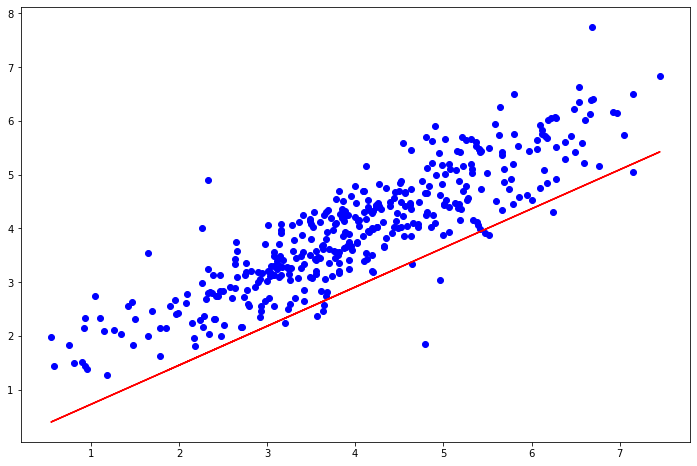

In [16]:
# on va construire la droite Y = m*X + b ET DONC FINALISER
plt.figure (figsize = (12,8))
m, b = np.polyfit (y_test, prediction, 1)
plt.plot(y_test, prediction, 'bo', y_test, m*y_test, 'r')

## Analyse des erreurs avec les métriques

In [17]:
# MAE

MAE1 = mean_absolute_error(y_test, prediction)
      
# MSE

MSE1 = np.sqrt(mean_squared_error(y_test, prediction))

Nous avons ici testé le MAE et le MSE, nous constatons un écart important entre les deux variables.

Afin de sélectionner le meilleur paramètres, il est important de connaître la différence entre les deux méthodes :

- MAE : l'importance de l'erreur est linéaire avec son amplitude. A sélectionner si le Dataset contient des valeurs aberrantes.

- MSE : nous accordons une grande importance aux grandes erreurs.

Nous avons ici constaté que notre modèle contient certaines valeurs avec une erreur importante. Nous allons prendre la décision de sélectionner le MSE en qualité de métrique.

### Analyse des régulateurs

Afin de procéder à une analyse plus poussée, nous allons procéder à une utilisation des régulateurs. Nous allons utiliser le modèle du Lasso et celui du Regression Ridge.

Regression ridge : ce modèle a pour but de réduire l'amplitude des coefficients de la la régression linéaire.

Lasso : ce modèle a pour objectif d' annuler certains coefficients. Les variables qui auront un coefficient égal à zéro ne feront plus partie du modèle, qui en sera simplifié d'autant. Un tel modèle, avec beaucoup de coefficients nuls, est appelé un modèle parcimonieux. Il s'agit donc d'une méthode de sélection de variables et de réduction de dimension supervisée : les variables qui ne sont pas nécessaires à la prédiction de l'étiquette sont éliminées.

Elastic-Net : 



#### A.  Régression Ridge

In [18]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print(baseline_error)

0.44084210155182396


In [19]:
# Application du regression ridge

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])
    
    prediction2 = ridge.predict(X_test)
    # on va afficher le % d'apprentissage du modèle
A2 = ridge.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A2)


R2 = ridge.score(X_test, y_test)
print("Le score de test est de : ",R2)

T2 = end-start
print("La durée de chargement de la cellule est de : ", T2)

Le score d'apprentissage est de :  0.01869636596856039
Le score de test est de :  0.011294474646717068
La durée de chargement de la cellule est de :  8.05000000001499e-05


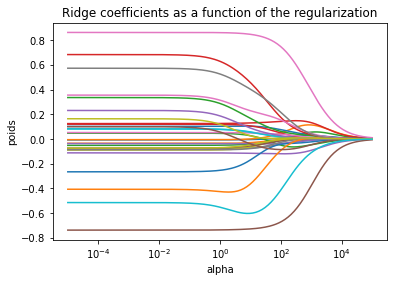

In [20]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('poids')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

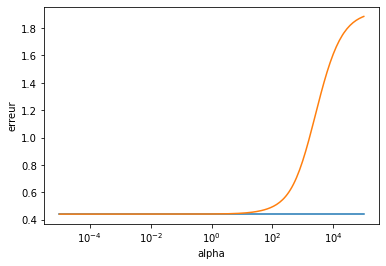

In [21]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur')
plt.axis('tight')
plt.show()

In [22]:
min(errors)

[0.44084210155182396, 0.44084210997711276]

In [23]:
# MAE

MAE2 = mean_absolute_error(y_test, prediction2)
      
# MSE

MSE2 = mean_squared_error(y_test, prediction2)

#### B. Lasso

In [24]:
n_alphas = 300
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])
    
    prediction3 = lasso.predict(X_test)
    # on va afficher le % d'apprentissage du modèle
A3 = lasso.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A3)


R3 = lasso.score(X_test, y_test)
print("Le score de test est de : ",R3)

T3 = end-start
print("La durée de chargement de la cellule est de : ", T3)

Le score d'apprentissage est de :  -8.023971335575675
Le score de test est de :  -8.518672808379089
La durée de chargement de la cellule est de :  8.05000000001499e-05


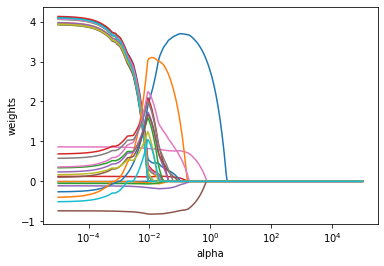

In [25]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

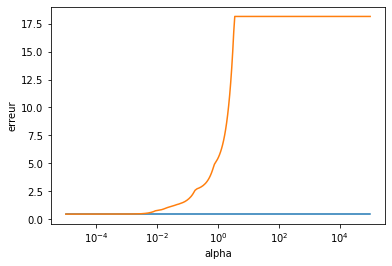

In [26]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur')
plt.axis('tight')
plt.show()

In [27]:
min(errors)

[0.44084210155182396, 0.4408069525563831]

In [28]:
# MAE

MAE3 = mean_absolute_error(y_test, prediction3)
      
# MSE

MSE3 = mean_squared_error(y_test, prediction3)

#### C. Elastic Net

In [29]:
n_alphas = 300
alphas = np.logspace(-5, 5, n_alphas)

modelelastic = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)

coefs = []
errors = []
for a in alphas:
    modelelastic.set_params(alpha=a)
    modelelastic.fit(X_train, y_train)
    coefs.append(modelelastic.coef_)
    errors.append([baseline_error, np.mean((modelelastic.predict(X_test) - y_test) ** 2)])
    
    prediction4 = modelelastic.predict(X_test)
    # on va afficher le % d'apprentissage du modèle
A4 =     modelelastic.set_params(alpha=a).score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A4)


R4 =     modelelastic.set_params(alpha=a).score(X_test, y_test)
print("Le score de test est de : ",R4)

T4 = end-start
print("La durée de chargement de la cellule est de : ", T4)

Le score d'apprentissage est de :  0.0
Le score de test est de :  -0.008893140011978717
La durée de chargement de la cellule est de :  8.05000000001499e-05


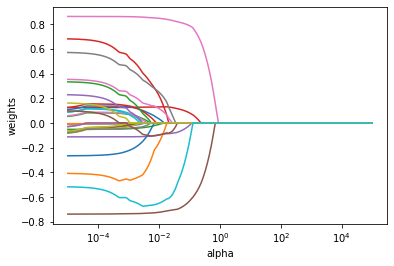

In [30]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

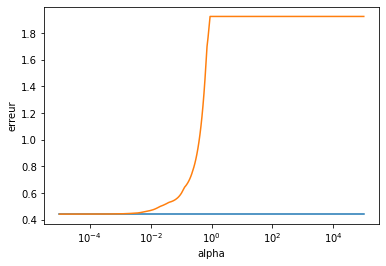

In [31]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur')
plt.axis('tight')
plt.show()

In [32]:
# MAE

MAE4 = mean_absolute_error(y_test, prediction4)
      
# MSE

MSE4 = mean_squared_error(y_test, prediction4)

## Analyse des régulateurs

In [33]:
A = [A1, A2, A3, A4]
R = [R1, R2, R3, R4]
T = [T1, T2, T3, T4]
MAE = [MAE1, MAE2, MAE3, MAE4]
MSE = [MSE1, MSE2, MSE3, MSE4]

indice = ['Modele linéaire', 'Regression Ridge', 'Lasso', 'Elastic']


data_lineaire = pd.DataFrame ({'Score Apprentissage': A,'Score Test' : R, 'MAE':MAE, 'MSE':MSE, 'Temps':T}, index = indice)
data_lineaire

,Score Apprentissage,Score Test,MAE,MSE,Temps
Modele linéaire,0.713238,0.768823,0.507969,0.663959,0.000081
Regression Ridge,0.018696,0.011294,1.091504,1.885411,0.000081
Lasso,-8.023971,-8.518673,4.030469,18.151627,0.000081
Elastic,0.000000,-0.008893,1.102969,1.923908,0.000081


Dans notre analyse, nous constatons que nos régulateurs ne permettent pas une forte amélioration.
Nous allons conserver, pour l'analyse de nos résultats, le modèle linéaire.

## 2. Arbre de décision

In [34]:
model2 = DecisionTreeRegressor(max_depth = 6, random_state = 1)

model2.fit(X_train, y_train)

prediction5 = model2.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A5 = model2.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A5)


R5 = model2.score(X_test, y_test)
print("Le score de test est de : ",R5)

T5 = end-start
print("La durée de chargement de la cellule est de : ", T5)

Le score d'apprentissage est de :  0.7896385636989849
Le score de test est de :  0.702908725836383
La durée de chargement de la cellule est de :  8.05000000001499e-05


In [35]:
# MAE

MAE5 = mean_absolute_error(y_test, prediction5)
      
# MSE

MSE5 = np.sqrt(mean_squared_error(y_test, prediction5))

Ce modèle présente un niveau d'erreur très important pour conserver son analyse pour la suite de notre projet.
Ce dernier présente un MSE trop important.

Nous allons tester le modèle XGBoost

## 3. XG Boost

In [36]:
model3 = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.5)
model3.fit(X_train, y_train)

prediction6 = model3.predict(X_test)


# on va afficher le % d'apprentissage du modèle
A6 = model3.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A6)


R6 = model3.score(X_test, y_test)
print("Le score de test est de : ",R6)

T6 = end-start
print("La durée de chargement de la cellule est de : ", T6)

Le score d'apprentissage est de :  0.9984719136515381
Le score de test est de :  0.7331671614135942
La durée de chargement de la cellule est de :  8.05000000001499e-05


In [37]:
# MAE

MAE6 = mean_absolute_error(y_test, prediction6)
      
# MSE

MSE6 = np.sqrt(mean_squared_error(y_test, prediction6))

In [38]:
dataprediction = pd.DataFrame({'Consommation réelle':y_test, 'Consommation prédite':prediction6})
dataprediction

,Consommation réelle,Consommation prédite
204,1.857859,1.494631
1395,5.792221,5.073601
767,4.185860,3.362883
1167,5.263312,4.267791
590,3.562749,2.573539
...,...,...
1472,5.252797,4.992220
1083,5.016816,5.045973
642,4.142817,4.206680
955,3.232779,3.259708


Text(0.5, 1.0, 'Analyse de la prédiction du XGBoost')

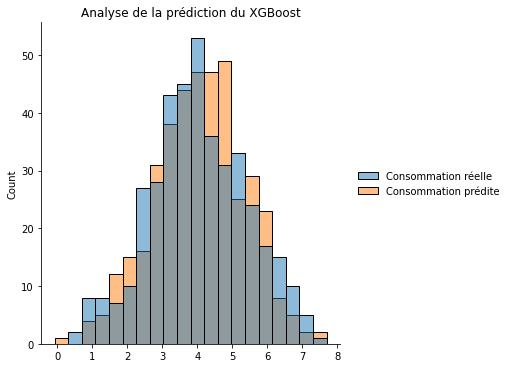

In [39]:
sns.displot(dataprediction)
plt.title('Analyse de la prédiction du XGBoost')

Text(0.5, 1.0, 'Analyse du XGBoost')

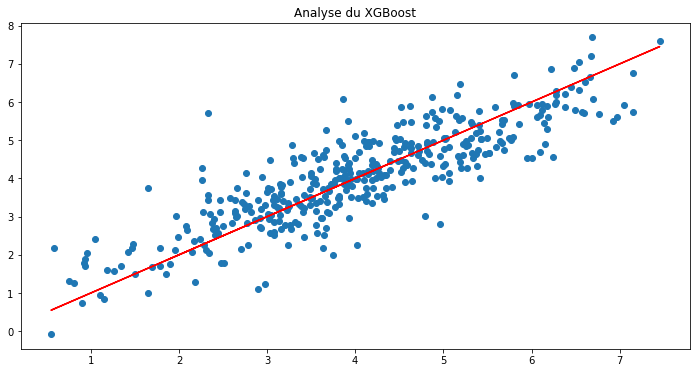

In [40]:
plt.figure(figsize = (12,6))

plt.scatter(y_test, prediction6)

plt.plot(y_test, y_test, 'r')
plt.title('Analyse du XGBoost')

## 5. Random Forest

In [41]:

model5 = RandomForestRegressor(n_estimators = 200, max_depth = 5)
model5.fit(X_train, y_train)

prediction7 = model5.predict(X_test)

# on va afficher le % d'apprentissage du modèle
A7 = model5.score(X_train, y_train)
print ("Le score d'apprentissage est de : ", A7)


R7 = model5.score(X_test, y_test)
print("Le score de test est de : ",R7)

T7 = start
print("La durée de chargement de la cellule est de : ", T7)

Le score d'apprentissage est de :  0.7728619093507941
Le score de test est de :  0.741361280464456
La durée de chargement de la cellule est de :  4.333593


In [42]:
# MAE

MAE7 = mean_absolute_error(y_test, prediction7)
      
# MSE

MSE7 = np.sqrt(mean_squared_error(y_test, prediction7))

In [43]:
dataprediction2 = pd.DataFrame({'Consommation réelle':y_test, 'Consommation prédite':prediction7})
dataprediction2

,Consommation réelle,Consommation prédite
204,1.857859,1.813080
1395,5.792221,4.580507
767,4.185860,3.921259
1167,5.263312,4.173499
590,3.562749,3.091629
...,...,...
1472,5.252797,5.143981
1083,5.016816,5.281298
642,4.142817,4.539867
955,3.232779,3.480606


Text(0.5, 1.0, 'Analyse de la prédiction du Random Forest')

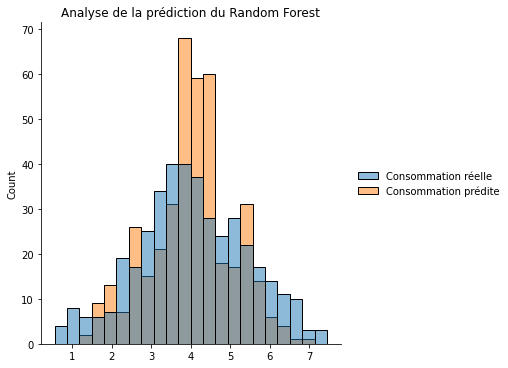

In [44]:
sns.displot(dataprediction2)
plt.title('Analyse de la prédiction du Random Forest')

Text(0.5, 1.0, 'Analyse de la prédiction du Random Forest')

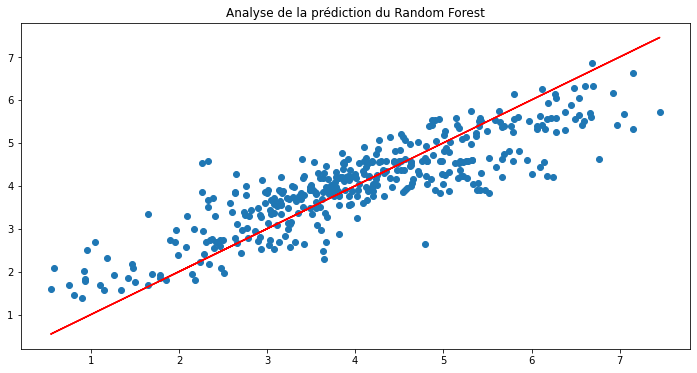

In [45]:
plt.figure(figsize = (12,6))

plt.scatter(y_test, prediction7)

plt.plot(y_test, y_test, 'r')
plt.title('Analyse de la prédiction du Random Forest')

Nous avons ici un apprentissage ayant très bien fonctionné mais un niveau de test avec un score plutôt faible.
Nous constatons un niveau d'erreur assez important et un fort écart sur les prédictions.

# IV. Analyse des modélisations

### 1. Analyse des résultats

In [46]:
A = [A1, A5, A6, A7]
R = [R1, R5, R6, R7]
T = [T1, T5, T6, T7]
MAE = [MAE1, MAE5, MAE6, MAE7]
MSE = [MSE1, MSE5, MSE6, MSE7]

indice = ['Modele linéaire', 'Arbre de Décision', 'XGBoost', 'Random Forest']


data_analyse = pd.DataFrame ({'Score Apprentissage': A,'Score Test' : R, 'MAE':MAE, 'MSE':MSE, 'Temps':T}, index = indice)
data_analyse

,Score Apprentissage,Score Test,MAE,MSE,Temps
Modele linéaire,0.713238,0.768823,0.507969,0.663959,0.000081
Arbre de Décision,0.789639,0.702909,0.588097,0.752687,0.000081
XGBoost,0.998472,0.733167,0.547508,0.713328,0.000081
Random Forest,0.772862,0.741361,0.546360,0.702290,4.333593


Text(0.5, 1.0, 'Représentation du MSE pour nos modèles')

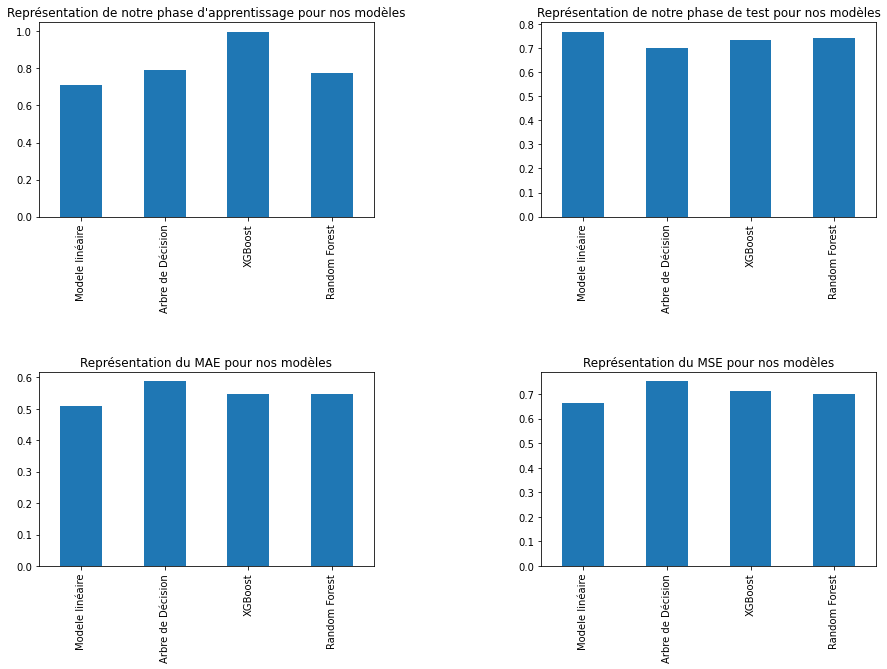

In [47]:
plt.figure (figsize = (15,10))
plt.subplots_adjust(hspace = 0.8, wspace = 0.5)

plt.subplot(2, 2, 1)
data_analyse['Score Apprentissage'].plot(kind = 'bar')
plt.title("Représentation de notre phase d'apprentissage pour nos modèles")

plt.subplot(2, 2, 2)
data_analyse['Score Test'].plot(kind = 'bar')
plt.title("Représentation de notre phase de test pour nos modèles")

plt.subplot(2, 2, 3)
data_analyse['MAE'].plot(kind = 'bar')
plt.title("Représentation du MAE pour nos modèles")

plt.subplot(2, 2, 4)
data_analyse['MSE'].plot(kind = 'bar')
plt.title("Représentation du MSE pour nos modèles")

Dans notre première phase de modélisation, nous pouvons constater que les 4 modèles sélectionnés présentent une certaine disparité dans nos données.

En effet, le modèle linéaire présente un score d'apprentissage et de test plutôt cohérent, l'arbre de décision a parfaitement appris le modèle mais la phase de test est peu convaincante.

POour le XGBoost et le RandomForest, ces derniers présentent les meilleurs résultats avec environ 70% de résultat ce qui représente un bon score.

Pour la suite de notre phase de modélisation, nous allons conserver uniquement ces deux modèles.

### 2. Analyse de l'apport des variables sur nos modèles

In [48]:
explainer = shap.TreeExplainer(model5)

row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Création de la donnée shap values
shap_values = explainer(X_train)


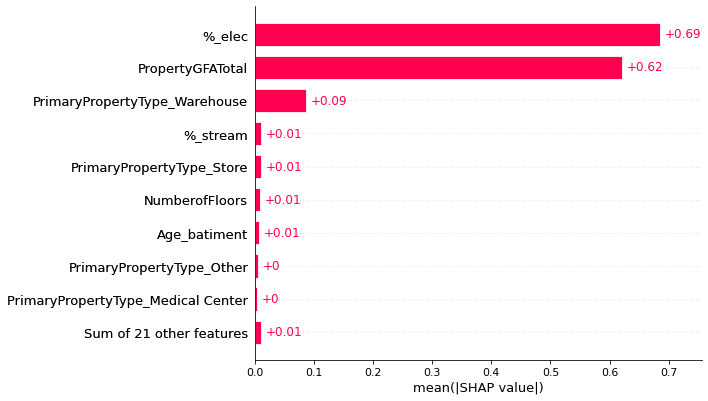

In [49]:
#Moyenne SHAP
shap.plots.bar(shap_values)

## V Modélisation avec la variable ENERGYSTAR Score

Nous allons de suite inclure la variable EnergyStar dans notre modèle.

Dans le cadre de notre modélisation, nous allons prendre la décision de conserver uniquement le Random Forest et le XGBoost qui présentent les meilleurs scores de prédiction.


In [50]:
data = pd.concat([data, energy_star], axis = 1)
data.reset_index(drop = True, inplace = True)

In [51]:
data.shape

(1610, 16)

Afin de procéder à notre modélisation, nous allons procéder à la suppression des lignes ayant des valeurs manquantes puis nous allons procéder à une méthode identique à notre première phase de modélisation.

In [52]:
data.dropna(how = 'any', inplace = True)

In [53]:
# Réindéxation

data.reset_index(drop = True, inplace = True)

In [54]:
data

,NumberofBuildings,NumberofFloors,Neighborhood,PropertyGFAParking,%_stream,BuildingType,PrimaryPropertyType,GHGEmissionsIntensity,Age_batiment,%_elec,%_gaz,PropertyGFATotal,PropertyGFABuilding(s),SiteEnergyUse(kBtu),TotalGHGEmissions,ENERGYSTARScore
0,0.693147,1.098612,EAST,0.000000,0.000000,NonResidential,Warehouse,0.0400,96,0.913855,0.086148,10.045031,10.045031,11.498627,0.625938,99.0
1,0.693147,0.693147,SOUTHWEST,0.000000,0.000000,NonResidential,Office,0.0300,45,1.000003,0.000000,10.076306,10.076306,11.521317,0.530628,100.0
2,0.693147,1.098612,NORTHEAST,0.000000,0.000000,NonResidential,Office,0.0400,62,0.999997,0.000000,9.905486,9.905486,11.559077,0.548121,100.0
3,0.693147,0.693147,NORTH,0.000000,0.000000,NonResidential,Warehouse,0.1200,39,0.634907,0.365093,9.995930,9.995930,11.636302,1.305626,100.0
4,0.693147,1.098612,LAKE UNION,0.000000,0.000000,NonResidential,Warehouse,0.0400,59,1.000003,0.000000,9.910513,9.910513,11.665540,0.593327,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0.693147,2.564949,DOWNTOWN,0.000000,0.503475,NonResidential,Hotel,4.1025,93,0.426273,0.070252,13.203586,13.162967,17.849489,7.654406,45.0
1069,0.693147,3.761200,DOWNTOWN,0.000000,0.017459,NonResidential,Office,0.3000,11,0.975664,0.006877,13.381685,13.162967,17.849731,6.178069,97.0
1070,0.693147,3.850148,DOWNTOWN,13.147269,0.000000,NonResidential,Office,0.3500,27,0.948096,0.051904,13.381685,13.162967,17.851628,6.275101,89.0
1071,0.693147,2.197225,NORTHEAST,0.000000,0.000000,NonResidential,Medical Center,4.1025,3,0.479587,0.520413,12.706851,12.706851,17.871883,7.490356,58.0


### 1. Séparation du jeu de données

In [55]:
y1 = data['TotalGHGEmissions']
X1 = data.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'], axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 100)

### 2. Encodage et standardisation

In [56]:
numeric = X1_train.select_dtypes(['float64', 'int64']).columns
normalisation=StandardScaler()

# Preprocessing OneHot    
categ=X1_train.select_dtypes('object').columns
OneHot=OneHotEncoder(handle_unknown='ignore',sparse=False)


preprocessor = ColumnTransformer(transformers=[ ('num', normalisation, numeric),
                                                ('cat', OneHot, categ)])

# Apprentissage de l'encodage et transformation des données d'entrainement
X1_train=preprocessor.fit_transform(X1_train)

# Récupération des noms des variables encodeés
encoded_names=numeric.to_list()
encoded_Cat_names=preprocessor.named_transformers_['cat'].get_feature_names(categ).tolist()
encoded_names.extend(encoded_Cat_names)

In [57]:
# Application du transformer déjà entrainé sur les données de test
X1_test= preprocessor.transform(X1_test)

# création des data frame contenant les jeux encodés
encoded_X_train=pd.DataFrame(X1_train,columns=encoded_names)
encoded_X_test=pd.DataFrame(X1_test,columns=encoded_names)

In [58]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = encoded_X_train.corr()

# optional: display a heatmap of the correlation matrix
# plt.figure(figsize=(11,11))
# sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.70:  #0.90 pour memoire essai à 0.80
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
corr_features

encoded_X_train.drop(labels=corr_features, axis=1, inplace=True)
encoded_X_test.drop(labels=corr_features, axis=1, inplace=True)

In [59]:
var = VarianceThreshold(threshold=0).fit(encoded_X_train)

low_var = var.get_support(indices=False)

low_var_encoded_X_train=encoded_X_train.loc[:,low_var]
low_var_encoded_X_test=encoded_X_test.loc[:,low_var]
low_var_encoded_X_train.head(5)

,NumberofBuildings,NumberofFloors,PropertyGFAParking,%_stream,Age_batiment,%_elec,PropertyGFATotal,ENERGYSTARScore,Neighborhood_BALLARD,Neighborhood_CENTRAL,...,BuildingType_NonResidential,BuildingType_Nonresidential COS,PrimaryPropertyType_Hotel,PrimaryPropertyType_Medical Center,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse
0,-0.079894,-1.039812,-0.537570,-0.225468,-1.119660,0.196420,0.975214,-0.149458,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.079894,1.523282,1.617850,-0.225468,-1.025833,-1.206160,0.466986,-0.185094,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.079894,2.573217,2.203829,-0.225468,-0.181391,0.153592,1.748291,0.028721,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.079894,-1.039812,-0.537570,-0.225468,0.287744,0.086264,0.166747,0.099993,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.079894,-1.039812,-0.537570,-0.225468,-0.243942,0.332020,-0.958399,-2.323249,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
X1_train=low_var_encoded_X_train
X1_test=low_var_encoded_X_test

### 3. XGBoost

In [61]:
model9 = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.5)
model9.fit(X1_train, y1_train)


prediction9 = model9.predict(X1_test)


A9 = model9.score(X1_train, y1_train)
print ("Le score d'apprentissage est de : ", A9)


R9 = model9.score(X1_test, y1_test)
print("Le score de test est de : ",R9)

T9 = end-start
print("La durée de chargement de la cellule est de : ", T9)

Le score d'apprentissage est de :  0.9999695790451423
Le score de test est de :  0.8387661492899985
La durée de chargement de la cellule est de :  8.05000000001499e-05


In [62]:
# MAE

MAE9 = mean_absolute_error(y1_test, prediction9)
      
# MSE

MSE9 = np.sqrt(mean_squared_error(y1_test, prediction9))

In [63]:
dataprediction3 = pd.DataFrame({'Consommation réelle':y1_test, 'Consommation prédite':prediction9})
dataprediction3

,Consommation réelle,Consommation prédite
433,4.186468,4.001117
30,2.088153,3.263353
880,4.795212,4.571345
225,3.533102,4.583940
740,3.677566,3.612914
...,...,...
191,2.089392,2.008226
735,4.323470,3.960201
1002,6.577764,6.239836
962,4.680834,4.755103


Text(0.5, 1.0, 'Analyse de la prédiction du XGBoost')

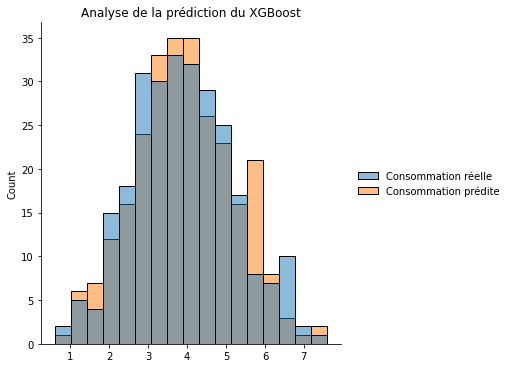

In [64]:
sns.displot(dataprediction3)
plt.title('Analyse de la prédiction du XGBoost')

Text(0.5, 1.0, 'Analyse de la prédiction du XGBoost')

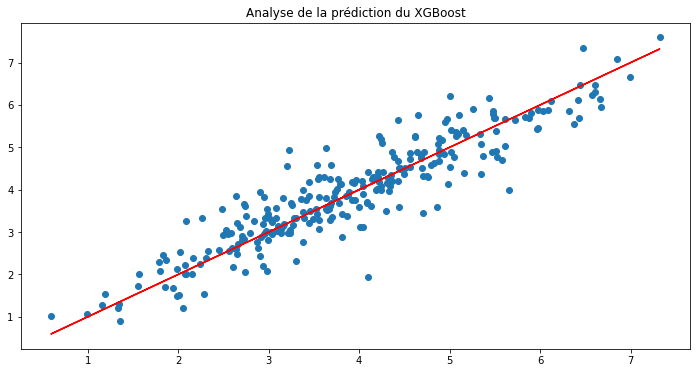

In [65]:
plt.figure(figsize = (12,6))

plt.scatter(y1_test, prediction9)

plt.plot(y1_test, y1_test, 'r')
plt.title('Analyse de la prédiction du XGBoost')

Concernant ce modèle, nous remarquons que ce dernier n'a subi aucun changement majeur dans son apprentissage ou dans sa prédiction.
L'ajout de la donnée EnergyStar n'a semble t'il aucun impact dans notre modélisation.

### 4. Random Forest

In [66]:
model10 = RandomForestRegressor(n_estimators = 200, max_depth = 5)
model10.fit(X1_train, y1_train)

prediction10 = model10.predict(X1_test)

A10 = model10.score(X1_train, y1_train)
print ("Le score d'apprentissage est de : ", A10)


R10 = model10.score(X1_test, y1_test)
print("Le score de test est de : ",R10)


T10 = end-start
print("La durée de chargement de la cellule est de : ", T10)

Le score d'apprentissage est de :  0.8648075657741502
Le score de test est de :  0.8031516499424809
La durée de chargement de la cellule est de :  8.05000000001499e-05


In [67]:
# MAE

MAE10 = mean_absolute_error(y1_test, prediction10)
print(MAE7)
# MSE

MSE10 = np.sqrt(mean_squared_error(y1_test, prediction10))
print(MSE7)

0.5463595748889104
0.7022897898526331


In [68]:
dataprediction4 = pd.DataFrame({'Consommation réelle':y1_test, 'Consommation prédite':prediction10})
dataprediction4

,Consommation réelle,Consommation prédite
433,4.186468,4.365260
30,2.088153,3.451107
880,4.795212,4.603230
225,3.533102,4.363261
740,3.677566,3.229812
...,...,...
191,2.089392,2.558404
735,4.323470,3.800140
1002,6.577764,5.462713
962,4.680834,4.525758


Text(0.5, 1.0, 'Analyse de la prédiction du Random Forest')

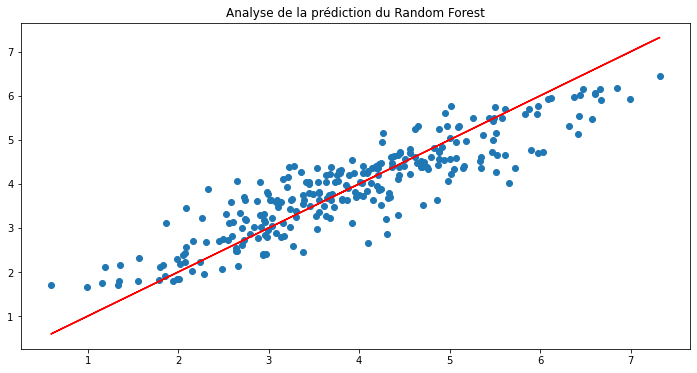

In [69]:
plt.figure(figsize = (12,6))

plt.scatter(y1_test, prediction10)

plt.plot(y1_test, y1_test, 'r')
plt.title('Analyse de la prédiction du Random Forest')

Text(0.5, 1.0, 'Analyse de la prédiction du Random Forest')

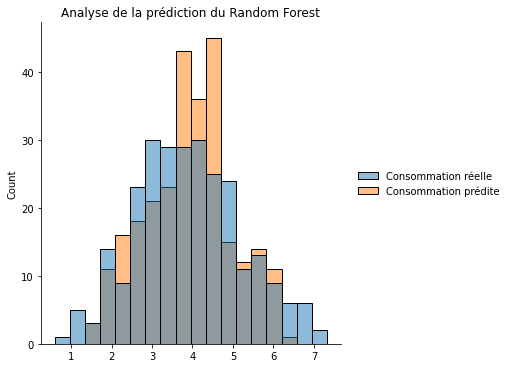

In [70]:
sns.displot(dataprediction4)
plt.title('Analyse de la prédiction du Random Forest')

Notre modélisation présente un taux d'erreurs plus élevé que sans la variable EnergyStarScore.
Le taux d'apprentissage et de prédiction reste très proche.

Pour ce modèle, nous pouvons également confirmer que cette variable ne présente aucun impact.

## IV. Analyse des modélisations

### 1. Analyse des résultats

In [71]:
A = [A6, A7, A9, A10]
R = [R6, R7, R9, R10]
T = [T6, T7, T9, T10]
MAE = [MAE6, MAE7, MAE9, MAE10]
MSE = [MSE6, MSE7, MSE9, MSE10]

indice = ['XGBoost sans ENERGYSTAR', 'Random Forest sans ENERGYSTAR', 'XGBoost avec ENERGYSTAR', 'Random Forest avec ENERGYSTAR']


data_analyse2 = pd.DataFrame ({'Score Apprentissage': A,'Score Test' : R, 'MAE':MAE, 'MSE':MSE, 'Temps':T}, index = indice)
data_analyse2

,Score Apprentissage,Score Test,MAE,MSE,Temps
XGBoost sans ENERGYSTAR,0.998472,0.733167,0.547508,0.713328,0.000081
Random Forest sans ENERGYSTAR,0.772862,0.741361,0.546360,0.702290,4.333593
XGBoost avec ENERGYSTAR,0.999970,0.838766,0.380816,0.517526,0.000081
Random Forest avec ENERGYSTAR,0.864808,0.803152,0.446904,0.571834,0.000081


Text(0.5, 1.0, 'Représentation du MSE pour nos modèles')

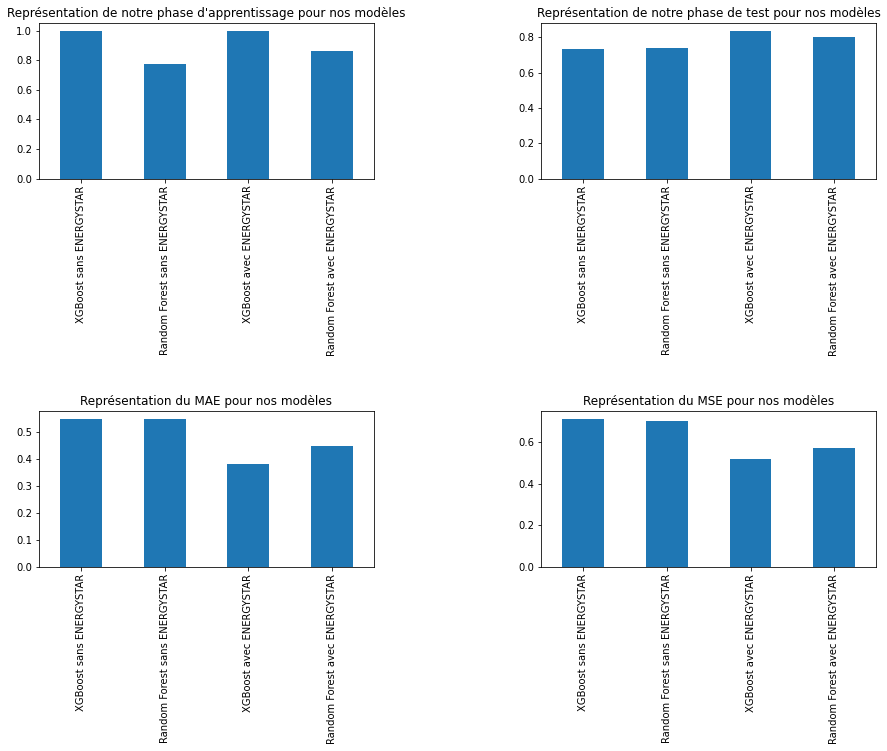

In [72]:
plt.figure (figsize = (15,10))
plt.subplots_adjust(hspace = 1.5, wspace = 0.5)

plt.subplot(2, 2, 1)
data_analyse2['Score Apprentissage'].plot(kind = 'bar')
plt.title("Représentation de notre phase d'apprentissage pour nos modèles")

plt.subplot(2, 2, 2)
data_analyse2['Score Test'].plot(kind = 'bar')
plt.title("Représentation de notre phase de test pour nos modèles")

plt.subplot(2, 2, 3)
data_analyse2['MAE'].plot(kind = 'bar')
plt.title("Représentation du MAE pour nos modèles")

plt.subplot(2, 2, 4)
data_analyse2['MSE'].plot(kind = 'bar')
plt.title("Représentation du MSE pour nos modèles")

Nous pouvons ici constater que le modèle XGBoost obtient le meilleur score de test avec environ 0.88, ce qui représente un excellent score. Nous allons ici procéder à une amélioration de notre score à travers une optimisation.
Seul le modèle XGBoost sera amélioré car ce dernier représente le meilleur résultat.

Pour cela, nous allons démarrer par la méthode du Cross Validation puis ensuite par la méthode du GridSearchCV pour tenter de trouver les paramètres permettant une amélioration de notre modèle.

# V. Optimisation des modèles

### Cross Validation du XGBoost

In [73]:
cross_val_score(GradientBoostingRegressor(), X1_train, y1_train, cv = 10).mean()

0.8570745279952023

In [74]:
%%time

est = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
score_apprentissage, score_validation = validation_curve(model9, X1_train, y1_train,
                                                        param_name = 'n_estimators',
                                                        param_range = est, cv = 10)

Wall time: 1min 26s


In [75]:
score_validation.mean(axis = 1)

array([0.81617618, 0.80477421, 0.80875624, 0.80946553, 0.80602425,
       0.80057081, 0.80448798, 0.80555244, 0.80884422, 0.80754084])

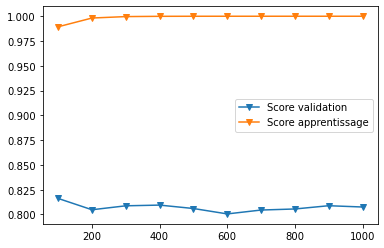

In [76]:
plt.plot(est, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(est, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

In [77]:
%%time

est = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
score_apprentissage, score_validation = validation_curve(model9, X1_train, y1_train,
                                                        param_name = 'learning_rate',
                                                        param_range = est, cv = 10)

Wall time: 1min 1s


In [78]:
score_validation.mean(axis = 1)

array([0.40692651, 0.8366129 , 0.85518753, 0.844538  , 0.84945352,
       0.83182847, 0.82520308, 0.82284197])

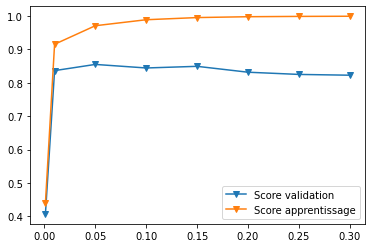

In [79]:
plt.plot(est, score_validation.mean(axis = 1), marker = 'v', label = 'Score validation')
plt.plot(est, score_apprentissage.mean(axis = 1), marker = 'v', label = 'Score apprentissage')
plt.legend()

Dans le cadre de notre Cross-Validation, nous pouvons constater les données suivantes :
    
    - notre modèle semble avoir la possibilité de procéder à une amélioration de son score de test grâce aux paramètres,
    - pour le n_estimators, le meilleur score semble être présent entre 10 et 100, nous allons tester également les données 300 et 500 qui semblent assez proches,
    - pour le learning_rate, le meilleur score semble être présent entre 0.03 et 0.06.
    
Nous allons tester les paramètres suivants afin de répondre à une amélioration de notre modèle.

### 1. Optimisation du XGBoost

In [80]:
%%time

grid_param = {'n_estimators': [20, 40, 60, 80 ,100, 300],
             'learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07]}
              
grid_search_xg = GridSearchCV(GradientBoostingRegressor(), grid_param, cv = 5, verbose = 5)

Wall time: 0 ns


In [81]:
%%time

# ici, on entraine la fonction
grid_search_xg.fit(X1_train, y1_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END learning_rate=0.03, n_estimators=20;, score=0.459 total time=   0.0s
[CV 2/5] END learning_rate=0.03, n_estimators=20;, score=0.464 total time=   0.0s
[CV 3/5] END learning_rate=0.03, n_estimators=20;, score=0.458 total time=   0.0s
[CV 4/5] END learning_rate=0.03, n_estimators=20;, score=0.480 total time=   0.0s
[CV 5/5] END learning_rate=0.03, n_estimators=20;, score=0.447 total time=   0.0s
[CV 1/5] END learning_rate=0.03, n_estimators=40;, score=0.639 total time=   0.0s
[CV 2/5] END learning_rate=0.03, n_estimators=40;, score=0.635 total time=   0.0s
[CV 3/5] END learning_rate=0.03, n_estimators=40;, score=0.652 total time=   0.0s
[CV 4/5] END learning_rate=0.03, n_estimators=40;, score=0.668 total time=   0.0s
[CV 5/5] END learning_rate=0.03, n_estimators=40;, score=0.620 total time=   0.0s
[CV 1/5] END learning_rate=0.03, n_estimators=60;, score=0.726 total time=   0.0s
[CV 2/5] END learning_rate=0.03, n_e

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07],
                         'n_estimators': [20, 40, 60, 80, 100, 300]},
             verbose=5)

In [82]:
# Obtenir le meilleur score selon nos choix d'hyperparamètres
print('Le meilleur score avec les hyperparamètres est de : ',grid_search_xg.best_score_)

# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search_xg.best_params_)

Le meilleur score avec les hyperparamètres est de :  0.8647040015651957
Les meilleurs hyperparamètres sont :  {'learning_rate': 0.07, 'n_estimators': 300}


# 

Nous pouvons constater que la sélection de nos paramètres à travers une méthode du cross-validation puis le GridSearchCV a permis une amélioration d'environ 0.3 points à notre modèle pour obtenir un score final d'environ 0.86.

Nous pouvons affirmer que ce score présente un excellent score pour notre modèle. Le XGBoost sera le modèle sélectionné pour notre projet.

# 

### 3. Analyse de l'apport des variables sur nos modèles

Afin de déterminer le rapport de nos variables sur notre modèle, nous allons utiliser la bibliothèque shap.

Cette dernière va nous permettre de connaître les variables ayant la plus grande utilité pour notre modèle.

In [83]:
explainer = shap.TreeExplainer(model9)

In [84]:
row_to_show = 5
data_for_prediction = X1_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

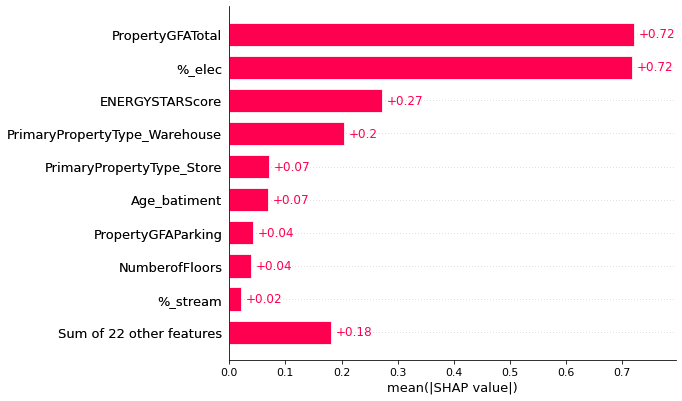

In [85]:
# Création de la donnée shap values
shap_values = explainer(X1_train)

#Moyenne SHAP
shap.plots.bar(shap_values)


Nous constatons ici que nos variables qualitatives concernant le % d'électricité dans la consommation d'un immeuble, la superficie totale et l'EnergyStarScore sont les principales variables ayant permis d'obtenir un score aussi important pour notre modèle.

A l'inverse, certaines variables semble n'avoir aucun impact. En effet, environ 24 colonnes dans notre modèle n'ont aucun impact sur notre modèle. Ces dernières peuvent avoir un impact de surajustement comme nous avons constaté dans notre modèle de prédiction de la consommation.

# Conclusion

Dans le cadre de notre projet, le but étant de pouvoir prédire la consommation de CO2 mais aussi la consommation pour les immeubles afin de répondre à un critères de neutralité carbone d'ici 2050.

Nous constatons que plusieurs modélisations ont lieu et que notre score maximale tourne autour de 0.86 après optimisation, ce qui nous permet d'indiquer que notre modèle présente un excellent niveau de prédiction des données. Notre optimisation du modèle sélectionné a permis une amélioration de ce dernier.

Certaines variables ont un apport faible dans notre modélisation tandis que seuls quelques données ont un apport permettant l'amélioration de notre modèle.

Sur les modèles testés, nous avons utilisé deux possibilités. A savoir, les modèles linéaires standards (régression linéaire par exemple) mais aussi les modèles ensemblistes (XGBoost par exemple). Ces derniers ont tendance à donner de meilleurs résultats pour notre problématique.

Enfin, nous pouvons constater que certaines données ou informations sont absentes et auraient permis une amélioration de notre connaissance des immeubles mais aussi une amélioration de notre modèle tels que le niveau de rénovation des immeubles (date et nature des travaux) mais également des données liées à l'isolation des immeubles.